In [1]:
import pandas as pd
import os
import json
import glob
import nltk
import sklearn
import numpy as np
import re

In [2]:
metadata_csv_path = os.path.join(os.path.abspath(os.path.curdir), "docs\\CORD-19-research-challenge\\metadata.csv")

In [3]:
metaCSV = pd.read_csv(metadata_csv_path)
metaCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51078 entries, 0 to 51077
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cord_uid                     51078 non-null  object 
 1   sha                          38022 non-null  object 
 2   source_x                     51078 non-null  object 
 3   title                        50920 non-null  object 
 4   doi                          47741 non-null  object 
 5   pmcid                        41082 non-null  object 
 6   pubmed_id                    37861 non-null  float64
 7   license                      51078 non-null  object 
 8   abstract                     42352 non-null  object 
 9   publish_time                 51070 non-null  object 
 10  authors                      48891 non-null  object 
 11  journal                      46368 non-null  object 
 12  Microsoft Academic Paper ID  964 non-null    float64
 13  WHO #Covidence  

In [4]:
metaCSV = metaCSV[['cord_uid', 'sha', 'pmcid', 'title', 'abstract', 'authors', 'journal']]
#metaCSV.head()

In [5]:
#Only keep the items with titles, abstracts, and sha values.
metaCSV.dropna(inplace=True, subset = {'title', 'abstract', 'sha'})


In [6]:
filename = metaCSV.iloc[3,1] + ".json"
filepath = "docs\\CORD-19-research-challenge\\comm_use_subset\\comm_use_subset\\pdf_json\\" + filename
os.path.abspath(filepath)

'C:\\Users\\Nic\\PycharmProjects\\cs5293sp20-project2\\docs\\CORD-19-research-challenge\\comm_use_subset\\comm_use_subset\\pdf_json\\5b68a553a7cbbea13472721cd1ad617d42b40c26.json'

In [7]:
loop_count = 0
in_comm_use = []
in_noncomm_use = []
in_custom_license = []
in_biorxiv_medrxiv = []

in_any_subset = []

for items in metaCSV['sha']:
    filename = metaCSV.iloc[loop_count,1] + ".json"
    filepath1 = "docs\\CORD-19-research-challenge\\comm_use_subset\\comm_use_subset\\pdf_json\\" + filename
    filepath2 = "docs\\CORD-19-research-challenge\\noncomm_use_subset\\noncomm_use_subset\\pdf_json\\" + filename
    filepath3 = "docs\\CORD-19-research-challenge\\custom_license\\custom_license\\pdf_json\\" + filename
    filepath4 = "docs\\CORD-19-research-challenge\\biorxiv_medrxiv\\biorxiv_medrxiv\\pdf_json\\" + filename

    in_comm_use.append(os.path.exists(os.path.abspath(filepath1)))
    in_noncomm_use.append(os.path.exists(os.path.abspath(filepath2)))
    in_custom_license.append(os.path.exists(os.path.abspath(filepath3)))
    in_biorxiv_medrxiv.append(os.path.exists(os.path.abspath(filepath4)))
    
    
    if in_comm_use[loop_count] == True or in_noncomm_use[loop_count] == True or in_custom_license[loop_count] == True or in_biorxiv_medrxiv[loop_count] == True:
        in_any_subset.append(True)
    else:
        in_any_subset.append(False)
    loop_count = loop_count + 1
#pd.Series(in_any_subset)
#in_any_subset

In [8]:
meta_CSV = metaCSV[in_any_subset]
meta_CSV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31646 entries, 0 to 51076
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cord_uid  31646 non-null  object
 1   sha       31646 non-null  object
 2   pmcid     26925 non-null  object
 3   title     31646 non-null  object
 4   abstract  31646 non-null  object
 5   authors   31487 non-null  object
 6   journal   29928 non-null  object
dtypes: object(7)
memory usage: 1.9+ MB


In [9]:
#There are 9,524 items in the comm_use_subset pdf list
#There are 9,148 items in the comm_use_subset pmc list
#There are 2,490 items in the noncomm_use_subset pdf list
#There are 2,217 items in the noncomm_use_subset pmc list
#There are 26,505 items in the custom_license pdf list
#There are 7,802 items in the custom_license pmc list
#There are 1,625 items in the biorxiv_medrxiv pdf list

#That's a total of 40,144 pdf papers (with sha names)
#Using the sha code, we found 31,646 papers.
#So, 8,498 items were not found with the sha code, that's fine.

#We can now take a random sample of these 31,000 papers to generate a much smaller list of 5000.

percent = 0.1

documentFraction = round(percent * len(meta_CSV))


meta_sample = meta_CSV.sample(n = documentFraction, random_state = 666) #because it's funny
meta_sample.head()


,cord_uid,sha,pmcid,title,abstract,authors,journal
13761,3zturry3,dd63c8a6ff3ae72819472ca9eef5dfb0f13afb5e,PMC7089353,High-level expression of a human β-site APP cl...,Plastid transformation has to date been applie...,"Youm, Jung Won; Jeon, Jae Heung; Kim, Hee; Min...",Transgenic Res
12425,yi2l5bcu,7e4c7d38872c37923d5ba6e8da2c6b01b72f176d,PMC7080100,Review of plasmonic fiber optic biochemical se...,This paper presents a brief overview of the te...,"Caucheteur, Christophe; Guo, Tuan; Albert, Jac...",Anal Bioanal Chem
5169,pd9lt4n2,dd969a7721176db21314930b62e62a37e902dae5,PMC4453572,Heparan Sulfate-Dependent Enhancement of Henip...,"Nipah virus and Hendra virus are emerging, hig...","Mathieu, Cyrille; Dhondt, Kévin P.; Châlons, M...",mBio
5971,r46d5kdu,33310fc6d99fa6bbf3aa6160168f3acba6a736d7,PMC4728157,Roles of the hemagglutinin of influenza A viru...,Seasonal influenza epidemics and influenza pan...,"Jiang, Shibo; Li, Runming; Du, Lanying; Liu, S...",Protein & Cell
50818,e93nu56p,adec4c54ca0073999de9e63c5806585d5ac2c358,PMC7116949,The ventilation of multiple-bed hospital wards...,Abstract Hospital and healthcare facilities ha...,"Yau, Y.H.; Chandrasegaran, D.; Badarudin, A.",Building and Environment


In [10]:
filepaths = []

def findPaths(df):
    
    for i in range (0,len(df)):
        sha = df.iloc[i,1] #meta_sample.iloc[i,1]
        filename = sha + ".json"
    
        filepath1 = "docs\\CORD-19-research-challenge\\comm_use_subset\\comm_use_subset\\pdf_json\\" + filename
        filepath2 = "docs\\CORD-19-research-challenge\\noncomm_use_subset\\noncomm_use_subset\\pdf_json\\" + filename
        filepath3 = "docs\\CORD-19-research-challenge\\custom_license\\custom_license\\pdf_json\\" + filename
        filepath4 = "docs\\CORD-19-research-challenge\\biorxiv_medrxiv\\biorxiv_medrxiv\\pdf_json\\" + filename
    
        if os.path.exists(os.path.abspath(filepath1)):
            filepaths.append(filepath1)
        elif os.path.exists(os.path.abspath(filepath2)):
            filepaths.append(filepath2)
        elif os.path.exists(os.path.abspath(filepath3)):
            filepaths.append(filepath3)
        elif os.path.exists(os.path.abspath(filepath4)):
            filepaths.append(filepath4)

findPaths(meta_sample)
    
#filepaths[:2]
    
    #globstring = os.path.abspath(os.curdir) + '\\docs\\CORD-19-research-challenge\\**\\pdf_json\\' + filename
    #filepath = glob.glob(globstring, recursive = True)
    #filepaths.append(filepath)

In [11]:
#Excellent. Now we need to read in the .json files in a way that allows us to access the text, so we can tokenize it.


full_text_list = []

def getFullText(paths):
    
    for i in range (0,len(paths)):

        with open(paths[i], 'r') as file:
            myjson = json.load(file)
            file.close()


        full_text = ""
        for x in range(0,len(myjson['body_text'])):
            if x == len(myjson['body_text'])-1:
                full_text = full_text + myjson['body_text'][x]["text"]
            else:      
                full_text = full_text + myjson['body_text'][x]["text"] + " "
    
        #Just some helpful progress text since this block takes a few seconds.
        if i % 500 == 0:
            print("text " + str(i) + " processed")
        if i == len(filepaths) - 1:
            print("text " + str(i) + " processed")

        full_text_list.append(full_text)
        

getFullText(filepaths)

text 0 processed
text 500 processed
text 1000 processed
text 1500 processed
text 2000 processed
text 2500 processed
text 3000 processed
text 3164 processed


In [12]:
full_abstract_list = []


def getFullAbstracts(paths):
    
    for i in range (0,len(paths)):

        with open(paths[i], 'r') as file:
            myjson = json.load(file)
            file.close()


        full_abstract_text = ""
        for x in range(0,len(myjson['abstract'])):
            if x == len(myjson['abstract'])-1:
                full_abstract_text = full_abstract_text + myjson['abstract'][x]["text"]
            else:      
                full_abstract_text = full_abstract_text + myjson['abstract'][x]["text"] + " "
    
        if i % 500 == 0:
            print("abstract " + str(i) + " processed")
        elif i == len(filepaths) - 1:
            print("abstract " + str(i) + " processed")
        
        full_abstract_list.append(full_abstract_text)
        
getFullAbstracts(filepaths)

abstract 0 processed
abstract 500 processed
abstract 1000 processed
abstract 1500 processed
abstract 2000 processed
abstract 2500 processed
abstract 3000 processed
abstract 3164 processed


# Now we can start doing some NLP

### We first must clean up the raw text

In [13]:
#Here is where we can actually start doing some Natural Language Processing.
#Step 1 is always to clean up our text. The raw text is kinda a hot mess, lots of extra symbols, tons of words which cloud the
#meaning of the text (stopwords, "the", "we", "a", etc. stuff like that)


#nltk.download('stopwords') need this for the first run.
stop_words = nltk.corpus.stopwords.words('english')
extraStopWords = ['et','al', 'al.', '(', ')', ',', '.', ':', ';', '%', '#', '@', '&', '!', '?', '[', ']', "''", "``", "'", 
                  '..', '...', '/', '-', '--', '>', '<', '=', '+', '\\']
stop_words.extend(extraStopWords)

clean_text = []

def normalizeDoc(txt):
    for i in range(0,len(txt)):
        myText = txt[i]
        
        myText = re.sub(r'[^a-zA-Z0-9\s]','', myText, re.I) #Says match anything EXCEPT letters and numbers or whitespaces and turn them into blanks.
        myText = re.sub(r'\b[a-zA-Z]\b', '', myText, re.I) #removes single letters like ' a ' ' b ' surrounded by spaces
        myText = re.sub(r'\b\d*\b', '', myText) #Matches any number surrounded by word boundaries and removes them.
        myText = re.sub(r'\b\d.*\b', '', myText) #Matches any word starting in a number, and removes them. There is a LOT of junk
                                                  #like 2n, 2r, 3bc, 3d7, stuff like that.
        myText = re.sub(r'\b[a-zA-Z]\d*\b', '', myText) #Matches works like a12334 and a11111111, b24, stuff like this. These words tend to
                                                    #reference specific antibodies, compounds, etc. Not super useful for clustering.
        myText = myText.lower()
        myText = myText.strip()
        tokens = nltk.word_tokenize(myText)
        clean_tokens = [t for t in tokens if t not in stop_words]
        clean_text.append(' '.join(clean_tokens))
        if i % 100 == 0:
            print("text " + str(i) + " tokens cleaned ("+ str(round(i/len(txt)*100,ndigits=2)) + "% complete)")
        elif i == len(txt) - 1:
            print("text " + str(i) + " tokens cleaned (100% complete)")
            
normalizeDoc(full_text_list)
len(clean_text)


text 0 tokens cleaned (0.0% complete)
text 100 tokens cleaned (3.16% complete)
text 200 tokens cleaned (6.32% complete)
text 300 tokens cleaned (9.48% complete)
text 400 tokens cleaned (12.64% complete)
text 500 tokens cleaned (15.8% complete)
text 600 tokens cleaned (18.96% complete)
text 700 tokens cleaned (22.12% complete)
text 800 tokens cleaned (25.28% complete)
text 900 tokens cleaned (28.44% complete)
text 1000 tokens cleaned (31.6% complete)
text 1100 tokens cleaned (34.76% complete)
text 1200 tokens cleaned (37.91% complete)
text 1300 tokens cleaned (41.07% complete)
text 1400 tokens cleaned (44.23% complete)
text 1500 tokens cleaned (47.39% complete)
text 1600 tokens cleaned (50.55% complete)
text 1700 tokens cleaned (53.71% complete)
text 1800 tokens cleaned (56.87% complete)
text 1900 tokens cleaned (60.03% complete)
text 2000 tokens cleaned (63.19% complete)
text 2100 tokens cleaned (66.35% complete)
text 2200 tokens cleaned (69.51% complete)
text 2300 tokens cleaned (72.6

3165

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Best conditions so far:
#tf = TfidfVectorizer(ngram_range=(1,2), strip_accents = 'ascii', min_df=3, max_df=0.6)

tf = TfidfVectorizer(ngram_range=(1,2), strip_accents = 'unicode', min_df=2, max_df=0.8)

#This is our vectorized data

tfidf_matrix = tf.fit_transform(clean_text)
tfidf_matrix.shape

(3165, 245097)

In [15]:
feature_list = tf.get_feature_names()
feature_list
#tf.get_stop_words()

['40',
 '41',
 'TM',
 'a0',
 'a1',
 'a1 a2',
 'a1 kanamycin',
 'a1 ml',
 'a1 ribosomal',
 'a10',
 'a1c',
 'a2',
 'a2 a3',
 'a20',
 'a2a',
 'a2b',
 'a2b ribavirin',
 'a3',
 'a3 a4',
 'a4',
 'a5',
 'a6',
 'a70',
 'a80',
 'aa',
 'aa aa',
 'aa amino',
 'aa composition',
 'aa deletion',
 'aa identity',
 'aa length',
 'aa residues',
 'aa sequence',
 'aa sequences',
 'aa terminus',
 'aaa',
 'aaa agc',
 'aaa family',
 'aaaa',
 'aaalac',
 'aaalac approved',
 'aac',
 'aac tt',
 'aag',
 'aan',
 'aan een',
 'aan het',
 'aand',
 'aandoeningen',
 'aanpak',
 'aantal',
 'aanwezig',
 'aap',
 'aarhus',
 'aas',
 'aat',
 'aat cca',
 'aatii',
 'aautp',
 'aautp aminoally1',
 'aautp interact',
 'aav',
 'aav vector',
 'aav2',
 'aav8',
 'aavs',
 'ab',
 'ab fragments',
 'ab gene',
 'ab genes',
 'ab initio',
 'ab repertoire',
 'ab responses',
 'ab uppsala',
 'ab wahrend',
 'aba',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abate',
 'abated',
 'abatement',
 'abattoir',
 'abattoirs',
 'abb',
 'abbas

# Now we will attempt some clustering.
## We will try two different methods to do our dimensionality reduction:
* T-SNE
* Latent Semantic Analysis (LSA), also known as Truncated Singular Value Decomposition (SVD)

In [16]:
#Computes the cosine similarity, a 1D way to represent similarity.

#from sklearn.metrics.pairwise import cosine_similarity
#doc_sim = cosine_similarity(tfidf_matrix)
#doc_sim_df = pd.DataFrame(doc_sim)
#doc_sim_df.info()
#doc_sim_df.head()

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity = 40, verbose=1, n_iter=5000)

tsne_model = tsne.fit_transform(tfidf_matrix)
tsne_model.shape


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3165 samples in 0.024s...
[t-SNE] Computed neighbors for 3165 samples in 2.039s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3165
[t-SNE] Computed conditional probabilities for sample 2000 / 3165
[t-SNE] Computed conditional probabilities for sample 3000 / 3165
[t-SNE] Computed conditional probabilities for sample 3165 / 3165
[t-SNE] Mean sigma: 0.505331
[t-SNE] KL divergence after 250 iterations with early exaggeration: 176.068237
[t-SNE] KL divergence after 4450 iterations: 3.419610


(3165, 2)

<function matplotlib.pyplot.show(*args, **kw)>

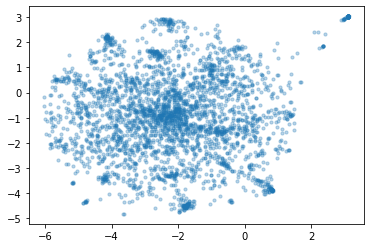

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.scatter(tsne_model[:,0], tsne_model[:,1], alpha = 0.3, s=10)
plt.show

#palette = sns.color_palette("bright", 2)
#sns.scatterplot(x=tsne_model[:,0], y=tsne_model[:,1], hue=tsne_model[:,1], legend='full')


In [19]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=30, max_iter=10000, n_init=50, random_state=42)
km.fit(tsne_model)
km.labels_


array([22,  1, 22, ..., 22, 25, 13])

In [20]:
#We will create silhouette scores to judge how good our clustering was.

from sklearn.metrics import silhouette_samples, silhouette_score

# This code was modified from Sklearn's website:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

range_n_clusters = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, max_iter=10000, n_init = 50, random_state=42)
    cluster_labels = clusterer.fit_predict(tsne_model)
    silhouette_avg = silhouette_score(tsne_model, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tsne_model, cluster_labels)


#Conclusion, all cluster numbers are relatively similar, 0.37 or 0.38 are not particularily impressive silhouette scores.
# (If you have pretty distinct clusters, you will get numbers closer to 0.7+)
# 45 clusters technically has the highest score, but marginally.
# We go with 15 clusters because it is a manageable amount, and has a >0.38 score.

#0.403 top score so far
#0.406
#0.413
#0.41488


For n_clusters = 5 The average silhouette_score is : 0.35115272
For n_clusters = 10 The average silhouette_score is : 0.37861666
For n_clusters = 15 The average silhouette_score is : 0.37969163
For n_clusters = 20 The average silhouette_score is : 0.39122993
For n_clusters = 25 The average silhouette_score is : 0.40467438
For n_clusters = 30 The average silhouette_score is : 0.4083132
For n_clusters = 35 The average silhouette_score is : 0.40034288
For n_clusters = 40 The average silhouette_score is : 0.40966627
For n_clusters = 45 The average silhouette_score is : 0.40440843
For n_clusters = 50 The average silhouette_score is : 0.40615302


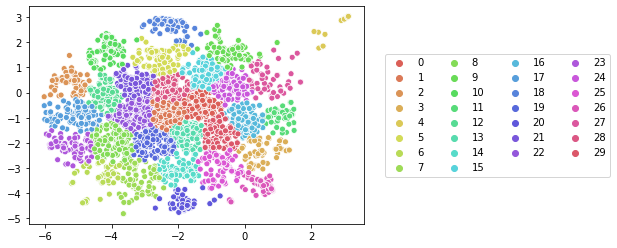

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

plot = sns.scatterplot(x=tsne_model[:,0], y=tsne_model[:,1], hue=km.labels_, 
                palette = sns.color_palette("hls", 30))
plot.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=4)


## Conclusion from t-SNE 
**So far, not that useful.**
We wind up with mostly a big glob. Silhouette Scores are around 0.4. We can probably do better!

## Now we will try the TruncatedSVD method

In [22]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, n_iter=100, random_state=42)
svd_model = svd.fit_transform(tfidf_matrix)
svd_model.shape

(3165, 2)

<function matplotlib.pyplot.show(*args, **kw)>

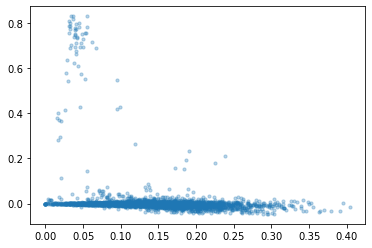

In [23]:
plt.scatter(svd_model[:,0], svd_model[:,1], alpha = 0.3, s=10)
plt.show

In [24]:
range_n_clusters = [2,3,4,5, 10, 15, 20]

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, max_iter=10000, n_init = 50, random_state=42)
    cluster_labels = clusterer.fit_predict(svd_model)
    silhouette_avg = silhouette_score(svd_model, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(svd_model, cluster_labels)
    
    
    #0.889 is a really nice score!

For n_clusters = 2 The average silhouette_score is : 0.8884684093852231
For n_clusters = 3 The average silhouette_score is : 0.5249318311917363
For n_clusters = 4 The average silhouette_score is : 0.49101260829784815
For n_clusters = 5 The average silhouette_score is : 0.49317649502045774
For n_clusters = 10 The average silhouette_score is : 0.41946227227870925
For n_clusters = 15 The average silhouette_score is : 0.3889228321189319
For n_clusters = 20 The average silhouette_score is : 0.37751893533153547


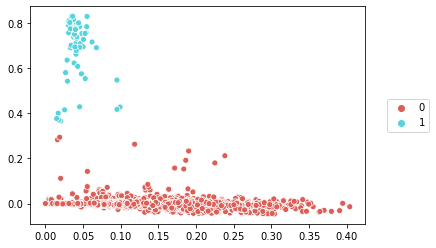

In [25]:
km = KMeans(n_clusters=2, max_iter=10000, n_init=50, random_state=42)
km.fit(svd_model)

plot = sns.scatterplot(x=svd_model[:,0], y=svd_model[:,1], hue=km.labels_, 
                palette = sns.color_palette("hls", 2))
plot.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

#The best score is with 2 clusters. These two clusters are highly distinct, and seperate very well.
#When we take a closer look at cluster 1,
#we find it is the non-English papers. So it is doing a good job actually seperating on something meaningful!
#Still, I took a look, and a couple papers on the border of cluster 1 are non-English. Let's increase the cluster to catch
#those as well.

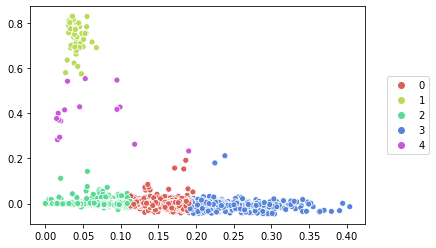

In [26]:
#Bumping up the clusters to 5 so that we can capture all the non-English papers.

km = KMeans(n_clusters=5, max_iter=10000, n_init=50, random_state=42)
km.fit(svd_model)

plot = sns.scatterplot(x=svd_model[:,0], y=svd_model[:,1], hue=km.labels_, 
                palette = sns.color_palette("hls", 5))
plot.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

In [27]:
meta_sample['k_cluster_1'] = km.labels_
meta_sample['coord1_SVD1'] = svd_model[:,0]
meta_sample['coord2_SVD1'] = svd_model[:,1]

paper_clusters = (meta_sample[['title', 'abstract', 'k_cluster_1', 'coord1_SVD1', 'coord2_SVD1']]
                  .sort_values(by=['k_cluster_1'],ascending=False))

paper_clusters[paper_clusters['k_cluster_1'] == 4]

#If we look carefully through cluster 4, there are two English papers. I am ok with getting rid of a couple English papers
# rather than leaving a couple non-English papers in.


#The next task is to remove the non-Engish papers, re-calculate the tfIDF, and cluster again.


,title,abstract,k_cluster_1,coord1_SVD1,coord2_SVD1
24099,3 Infecties van de onderste luchtwegen en tube...,Tot de onderste luchtwegen behoren alle onderd...,4,0.025462,0.414385
30589,Diarrhées néonatales à rotavirus résultats d'u...,Summary A retrospective survey was performed a...,4,0.016964,0.399514
8221,Contemporary HIV/AIDS research: Insights from ...,Knowledge management as a field is concerned w...,4,0.118397,0.262536
50942,Coronavirus humains (HCoV),Résumé Les coronavirus forment un grand groupe...,4,0.052826,0.552712
30534,Diagnostic moléculaire en pathologie infectieu...,Résumé Parmi les pathogènes responsables de pn...,4,0.017887,0.369474
41928,Mécanismes d’émergence virale et transmission ...,SUMMARY A large proportion of viral pathogens ...,4,0.094928,0.546365
24441,"Risico’s, melden en controles",Waar mensen werken worden fouten gemaakt. Ze r...,4,0.018917,0.293644
30505,Diarrhées infectieuses d'importation : diagnos...,Résumé Les diarrhées infectieuses d'importatio...,4,0.029321,0.541514
32138,Acute respiratory viral infections in pediatri...,Abstract Objective to estimate the prevalence ...,4,0.045414,0.428075
46551,Application of computational methods for antic...,"Abstract Developing a novel drug is a complex,...",4,0.094984,0.416751


## Conclusion from the Truncated SVD method
**We are seperating the non-English papers very well!**
We wind up with very high Silhouette scores with 2 clusters, and good scores with 3,4,and 5 clusters. What I will do next is DROP the non-English papers, and re-cluster with T-SNE to see if we can get better clusters. I think the Non-English papers are throwing my clustering off. But, still. Very cool we can seperate out non-English!

## Next, we will drop clusters 1 and 4 above, and re-cluster

In [28]:
#meta_sample_english

meta_sample_eng = meta_sample[meta_sample["k_cluster_1"] != 1]
meta_sample_eng = meta_sample_eng[meta_sample_eng["k_cluster_1"] != 4]

sum(meta_sample_eng["k_cluster_1"] == 4)

#meta_sample.iloc[0,7] #This is row 0, 'k_cluster'
meta_sample_eng.info()
#We wind up with 3108 items now.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3108 entries, 13761 to 885
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cord_uid     3108 non-null   object 
 1   sha          3108 non-null   object 
 2   pmcid        2659 non-null   object 
 3   title        3108 non-null   object 
 4   abstract     3108 non-null   object 
 5   authors      3094 non-null   object 
 6   journal      2943 non-null   object 
 7   k_cluster_1  3108 non-null   int32  
 8   coord1_SVD1  3108 non-null   float64
 9   coord2_SVD1  3108 non-null   float64
dtypes: float64(2), int32(1), object(7)
memory usage: 255.0+ KB


In [29]:
filepaths = []
full_text_list = []
clean_text = []


findPaths(meta_sample_eng)
getFullText(filepaths)
#No need to run the getAbstractsText(filepaths) this time, probably won't use it.
normalizeDoc(full_text_list)



text 0 processed
text 500 processed
text 1000 processed
text 1500 processed
text 2000 processed
text 2500 processed
text 3000 processed
text 3107 processed
text 0 tokens cleaned (0.0% complete)
text 100 tokens cleaned (3.22% complete)
text 200 tokens cleaned (6.44% complete)
text 300 tokens cleaned (9.65% complete)
text 400 tokens cleaned (12.87% complete)
text 500 tokens cleaned (16.09% complete)
text 600 tokens cleaned (19.31% complete)
text 700 tokens cleaned (22.52% complete)
text 800 tokens cleaned (25.74% complete)
text 900 tokens cleaned (28.96% complete)
text 1000 tokens cleaned (32.18% complete)
text 1100 tokens cleaned (35.39% complete)
text 1200 tokens cleaned (38.61% complete)
text 1300 tokens cleaned (41.83% complete)
text 1400 tokens cleaned (45.05% complete)
text 1500 tokens cleaned (48.26% complete)
text 1600 tokens cleaned (51.48% complete)
text 1700 tokens cleaned (54.7% complete)
text 1800 tokens cleaned (57.92% complete)
text 1900 tokens cleaned (61.13% complete)
te



## Now we will re-cluster, using the same two methods as before.



In [30]:
tf = TfidfVectorizer(ngram_range=(1,2), strip_accents = 'unicode', min_df=2, max_df=0.8)
tfidf_matrix = tf.fit_transform(clean_text)
tfidf_matrix.shape

(3108, 231216)

In [31]:
#perplex 20 and clusters 40 = 0.40635934
#perplex 25 and clusters 45 = 0.40987897
#perplex 27 and clusters 45 = 0.41009104
#perplex 28 and clusters 45 = 0.4162545 --best so far
#perplex 29 and clusters 45 = 0.41360596 
#perplex 30 and clusters 50 = 0.4130 
#perplex 35 and clusters 40 = 0.4057 
#perplex 40 and clusters 30 = 0.40419778
#perplex 50 and clusters 35 = 0.40226528

tsne = TSNE(perplexity = 28, verbose=1, n_iter=5000, random_state=666)
tsne_model = tsne.fit_transform(tfidf_matrix)
tsne_model.shape

[t-SNE] Computing 85 nearest neighbors...
[t-SNE] Indexed 3108 samples in 0.015s...
[t-SNE] Computed neighbors for 3108 samples in 1.931s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3108
[t-SNE] Computed conditional probabilities for sample 2000 / 3108
[t-SNE] Computed conditional probabilities for sample 3000 / 3108
[t-SNE] Computed conditional probabilities for sample 3108 / 3108
[t-SNE] Mean sigma: 0.495408
[t-SNE] KL divergence after 250 iterations with early exaggeration: 175.991348
[t-SNE] KL divergence after 2100 iterations: 3.781106


(3108, 2)

<function matplotlib.pyplot.show(*args, **kw)>

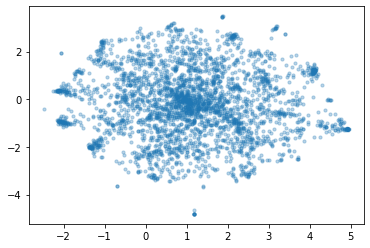

In [32]:
plt.scatter(tsne_model[:,0], tsne_model[:,1], alpha = 0.3, s=10)
plt.show

In [33]:
range_n_clusters = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter=10000, n_init = 50, random_state=42)
    cluster_labels = clusterer.fit_predict(tsne_model)
    silhouette_avg = silhouette_score(tsne_model, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(tsne_model, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.30357194
For n_clusters = 5 The average silhouette_score is : 0.3619155
For n_clusters = 10 The average silhouette_score is : 0.35778958
For n_clusters = 15 The average silhouette_score is : 0.38017118
For n_clusters = 20 The average silhouette_score is : 0.38264447
For n_clusters = 25 The average silhouette_score is : 0.39816108
For n_clusters = 30 The average silhouette_score is : 0.40741804
For n_clusters = 35 The average silhouette_score is : 0.4114888
For n_clusters = 40 The average silhouette_score is : 0.40953538
For n_clusters = 45 The average silhouette_score is : 0.4162545
For n_clusters = 50 The average silhouette_score is : 0.41385582


In [34]:
svd = TruncatedSVD(n_components=2, n_iter=100, random_state=42)
svd_model = svd.fit_transform(tfidf_matrix)
svd_model.shape

(3108, 2)

<function matplotlib.pyplot.show(*args, **kw)>

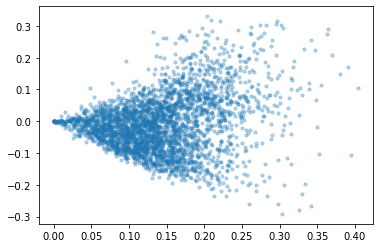

In [35]:
plt.scatter(svd_model[:,0], svd_model[:,1], alpha = 0.3, s=10)
plt.show

#Clearly it's not doing so well now. We will go with the TSNE for summarization and further analysis.

In [36]:
range_n_clusters = [2,3,4,5,10,15,20,25,30,40,50]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter=10000, n_init = 50, random_state=42)
    cluster_labels = clusterer.fit_predict(svd_model)
    silhouette_avg = silhouette_score(svd_model, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(svd_model, cluster_labels)
    
#best is still 2 clusters.

For n_clusters = 2 The average silhouette_score is : 0.4401332698748098
For n_clusters = 3 The average silhouette_score is : 0.3952437345163443
For n_clusters = 4 The average silhouette_score is : 0.3817103839001089
For n_clusters = 5 The average silhouette_score is : 0.3471253989722125
For n_clusters = 10 The average silhouette_score is : 0.3441770012468398
For n_clusters = 15 The average silhouette_score is : 0.34570006711407647
For n_clusters = 20 The average silhouette_score is : 0.3418109961365124
For n_clusters = 25 The average silhouette_score is : 0.335680037299153
For n_clusters = 30 The average silhouette_score is : 0.34081580985862675
For n_clusters = 40 The average silhouette_score is : 0.343983518743413
For n_clusters = 50 The average silhouette_score is : 0.34207924026835573


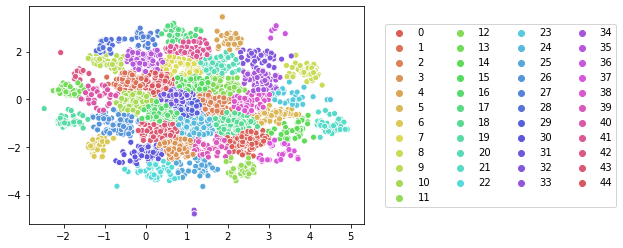

In [37]:
km_tsne = KMeans(n_clusters=45, max_iter=10000, n_init=50, random_state=42)
km_tsne.fit(tsne_model)
km_tsne.labels_

plot = sns.scatterplot(x=tsne_model[:,0], y=tsne_model[:,1], hue=km_tsne.labels_, 
                palette = sns.color_palette("hls", 45))
plot.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=4)


There are distinct clusters around the edges, and clusters on opposite sides of the map are probably quite different. Still a large blob in the middle. Probably tf-IDF isn't sensitive enough to detect more subtle changes. Or perhaps we were too aggressive cleaning our tokens, our perhaps not aggressive enough. Either way, we will go with it! It's doing a decent job now.


# Now we will summarize the documents within each cluster and write the summary to a file.


In [38]:
#To do this next part, we need SENTENCES from our meta_sample_eng texts.
#But first things first, append the cluster number to our meta_sample_eng dataframe.

meta_sample_eng['k_cluster_2'] = km_tsne.labels_
meta_sample_eng['coord1_TSNE2'] = tsne_model[:,0]
meta_sample_eng['coord2_TSNE2'] = tsne_model[:,1]


from nltk.tokenize import sent_tokenize
#We need to remove all 'et al.' , 'fig.' , 'Fig.'  the sentence tokenizer thinks it is the end of a sentence.
#We can go ahead and remove stopwords as well.



stop_words = nltk.corpus.stopwords.words('english')
#extraStopWords = ['et','al', 'al.']
#stop_words.extend(extraStopWords)



full_clean_text = []
for i in range(0,len(full_text_list)):
    full_text_list[i] = re.sub(r'et al.', '', full_text_list[i], re.I)
    full_text_list[i] = re.sub(r'fig.', 'fig', full_text_list[i], re.I)
    
    
    full_text_list[i] = full_text_list[i].lower()
    full_text_list[i] = full_text_list[i].strip()
    tokens = nltk.sent_tokenize(full_text_list[i])
    clean_sents = [t for t in tokens if t not in stop_words]        

    #clean_text.append(' '.join(clean_sents))
    
    full_clean_text.append(clean_sents)

    
meta_sample_eng['full_clean_text'] = full_clean_text

#I don't really need the k_cluster_1 and the coord1, coord2 anymore. I'll drop them now.
meta_sample_eng = meta_sample_eng[['cord_uid','sha', 'pmcid','title','abstract','authors','journal', 'full_clean_text','k_cluster_2','coord1_TSNE2', 'coord2_TSNE2']]

In [39]:
##########################
# Here is where I would start a loop through all the clusters, appending them together, then doing a summarization method.
# For now I will work on just 1 cluster to get it working.
cluster_sentences = []

for s in meta_sample_eng[meta_sample_eng['k_cluster_2'] == 0]['full_clean_text']:
  cluster_sentences.append(s)

cluster_sentences = [y for x in cluster_sentences for y in x] # flatten list

In [50]:
#Next step is Feature Extraction, with tf-IDF probably.
#from sklearn.feature_extraction.text import CountVectorizer

#cv = CountVectorizer()
#cv_matrix = cv.fit_transform(cluster_sentences)
#cv_matrix


<13435x15262 sparse matrix of type '<class 'numpy.int64'>'
	with 288716 stored elements in Compressed Sparse Row format>

In [66]:
#from sklearn.feature_extraction.text import TfidfTransformer

tf = TfidfVectorizer(min_df=2, max_df=0.8, use_idf=True)

#This is our vectorized data

tfidf_matrix = tf.fit_transform(cluster_sentences)
tfidf_matrix.toarray()
print(tfidf_matrix.shape)
print(tfidf_matrix.T.shape)

#normalized_matrix = TfidfTransformer().fit_transform(cv_matrix)
#normalized_matrix

(13435, 9423)
(9423, 13435)


In [69]:
tfTranspose = tfidf_matrix.T.toarray()
tfTranspose.shape

similarity_matrix = tfidf_matrix * tfTranspose
#similarity_matrix = np.matmul(tfidf_matrix, tfTranspose)


#print(similarity_matrix.shape)
#np.round(similarity_matrix, 3)

In [72]:
similarity_matrix

array([[1.        , 0.01315948, 0.08188134, ..., 0.02997752, 0.02558001,
        0.05525518],
       [0.01315948, 1.        , 0.01372196, ..., 0.        , 0.01744509,
        0.01388168],
       [0.08188134, 0.01372196, 1.        , ..., 0.00394455, 0.01603123,
        0.01696464],
       ...,
       [0.02997752, 0.        , 0.00394455, ..., 1.        , 0.        ,
        0.00571327],
       [0.02558001, 0.01744509, 0.01603123, ..., 0.        , 1.        ,
        0.04811889],
       [0.05525518, 0.01388168, 0.01696464, ..., 0.00571327, 0.04811889,
        1.        ]])

In [ ]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [53]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score in scores.items()),reverse=True)
ranked_sentences[:3]

array([[1.        , 0.01085274, 0.07333426, ..., 0.02684835, 0.02290987,
        0.04948743],
       [0.01085274, 1.        , 0.01263556, ..., 0.        , 0.01606393,
        0.01278264],
       [0.07333426, 0.01263556, 1.        , ..., 0.00394455, 0.01603123,
        0.01696464],
       ...,
       [0.02684835, 0.        , 0.00394455, ..., 1.        , 0.        ,
        0.00571327],
       [0.02290987, 0.01606393, 0.01603123, ..., 0.        , 1.        ,
        0.04811889],
       [0.04948743, 0.01278264, 0.01696464, ..., 0.00571327, 0.04811889,
        1.        ]])

In [54]:
import networkx as nx
nx_graph = nx.from_scipy_sparse_matrix(similarity_graph)
scores = nx.pagerank(nx_graph)
scores

KeyboardInterrupt: 

In [ ]:
import networkx as nx

In [41]:
#feature_name = tf.get_feature_names()

#feature_name[500:1000]

#topn_features = 20

#ordered_centroids = km.cluster_centers_
#ordered_centroids.argsort()[:, ::-1]

#for each cluster, I want to print out the top features (words)

#for cluster_num in range(5):
#    key_features = [feature_name[index]
#                for index in ordered_centroids[cluster_num, :topn_features]]
#    papers = paper_clusters[paper_clusters['k_cluster'] == cluster_num] ['title'].values.tolist()
#    print('CLUSTER #' +str(cluster_num+1))
#    print('Key Features:', key_features)